In [2]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

In [4]:
airline_tweets.head(10)

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   
5  570300767074181121          negative                        1.0000   
6  570300616901320704          positive                        0.6745   
7  570300248553349120           neutral                        0.6340   
8  570299953286942721          positive                        0.6559   
9  570295459631263746          positive                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   
5     Can't Tell                     0.6842  Virgin America   
6            NaN                     0.0000  Virgin America   
7            NaN                        NaN  Virgin America   
8            NaN                        NaN  Virgin America   
9            NaN                        NaN  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   
5                    NaN    jnardino                 NaN              0   
6                    NaN  cjmcginnis                 NaN              0   
7                    NaN       pilot                 NaN              0   
8                    NaN    dhepburn                 NaN              0   
9                    NaN  YupitsTate                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   
5  @VirginAmerica seriously would pay $30 a fligh...         NaN   
6  @VirginAmerica yes, nearly every time I fly VX...         NaN   
7  @VirginAmerica Really missed a prime opportuni...         NaN   
8    @virginamerica Well, I didn't…but NOW I DO! :-D         NaN   
9  @VirginAmerica it was amazing, and arrived an ...         NaN   

               tweet_created    tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800               NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800               NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800         Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800               NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800               NaN  Pacific Time (US & Canada)  
5  2015-02-24 11:14:33 -0800               NaN  Pacific Time (US & Canada)  
6  2015-02-24 11:13:57 -0800  San Francisco CA  Pacific Time (US & Canada)  
7  2015-02-24 11:12:29 -0800       Los Angeles  Pacific Time (US & Canada)  
8  2015-02-24 11:11:19 -0800         San Diego  Pacific Time (US & Canada)  
9  2015-02-24 10:53:27 -0800       Los Angeles  Eastern Time (US & Canada)

In [5]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


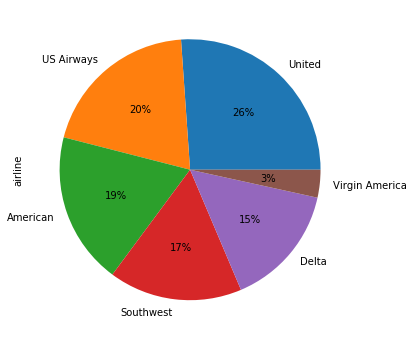

In [6]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

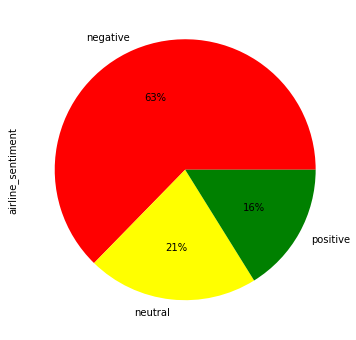

In [7]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [8]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [9]:
features


array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [10]:
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [14]:
labels.shape

(14640,)

In [15]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [16]:
processed_features

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica th

In [18]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [20]:
processed_features.shape

(14640, 2301)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [22]:
X_train.shape

(11712, 2301)

In [24]:
y_train.reshape(11712,1)

array([['positive'],
       ['negative'],
       ['negative'],
       ...,
       ['negative'],
       ['negative'],
       ['negative']], dtype=object)

In [25]:
from sklearn.neural_network import MLPClassifier

In [27]:
clf=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [29]:
predictions = clf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1557  235   78]
 [ 204  339   71]
 [  82   64  298]]
              precision    recall  f1-score   support

    negative       0.84      0.83      0.84      1870
     neutral       0.53      0.55      0.54       614
    positive       0.67      0.67      0.67       444

    accuracy                           0.75      2928
   macro avg       0.68      0.69      0.68      2928
weighted avg       0.75      0.75      0.75      2928

0.7493169398907104
